In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

path = "Autobus.vs.Metro.csv"

In [2]:
df = pd.read_csv(path)

In [3]:
vars=["Autobuses en operacion","Kilometros recorridos", "Pasajeros"]
df[vars]
df=df[vars].dropna()
df[vars].corr()

,Autobuses en operacion,Kilometros recorridos,Pasajeros
Autobuses en operacion,1.000000,0.980298,0.173866
Kilometros recorridos,0.980298,1.000000,0.308876
Pasajeros,0.173866,0.308876,1.000000


In [5]:
path = "Autobus.vs.Metro.csv"

In [6]:
df = pd.read_csv(path)

In [7]:
Autobus= df[df["TRANSPORTE"]==2]

In [8]:
X= pd.DataFrame(Autobus["Autobuses en operacion"])
X= sm.add_constant(X)
Y=pd.DataFrame(Autobus["Kilometros recorridos"])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [10]:
print(X_train.head())
print(X_train.shape)

     const  Autobuses en operacion
798    1.0                     674
236    1.0                    2178
228    1.0                    2272
274    1.0                    1127
632    1.0                     658
(298, 2)


In [11]:
print(X_test.head())
print(X_test.shape)

     const  Autobuses en operacion
838    1.0                     526
150    1.0                    2802
354    1.0                     700
60     1.0                    4143
716    1.0                     574
(129, 2)


In [12]:
print(y_test.head())
print(y_test.shape)

     Kilometros recorridos
838                3113232
150               18519000
354                3899800
60                25500600
716                3438177
(129, 1)


In [13]:
print(y_train.head())
print(y_train.shape)

     Kilometros recorridos
798                3661729
236               13599000
228               13599700
274                6399000
632                4260982
(298, 1)


In [14]:
model=sm.OLS(y_train,X_train)
model = model.fit()

In [15]:
model

In [16]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Kilometros recorridos   R-squared:                       0.973
Model:                               OLS   Adj. R-squared:                  0.973
Method:                    Least Squares   F-statistic:                 1.057e+04
Date:                   Thu, 21 Oct 2021   Prob (F-statistic):          1.27e-233
Time:                           15:30:44   Log-Likelihood:                -4629.5
No. Observations:                    298   AIC:                             9263.
Df Residuals:                        296   BIC:                             9270.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [17]:
residual_values=model.resid
residual_values

798   -1.035526e+05
236   -8.852634e+05
228   -1.554500e+06
274   -5.948047e+05
632    6.097322e+05
           ...     
142    4.097063e+06
212    4.750709e+05
540   -2.902336e+05
696    1.914498e+06
204    1.058472e+06
Length: 298, dtype: float64

In [18]:
m1_pred=model.fittedvalues
m1_pred

798    3.765282e+06
236    1.448426e+07
228    1.515420e+07
274    6.993805e+06
632    3.651250e+06
           ...     
142    1.870344e+07
212    1.912393e+07
540    5.390234e+06
696    1.798234e+06
204    1.804063e+07
Length: 298, dtype: float64

In [19]:
y_train.head(2)

,Kilometros recorridos
798,3661729
236,13599000


<AxesSubplot:ylabel='Count'>

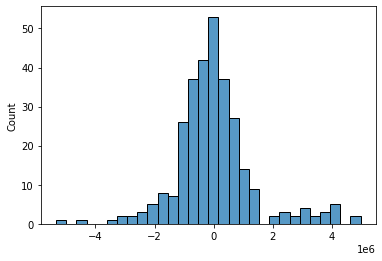

In [20]:
sns.histplot(model.resid)

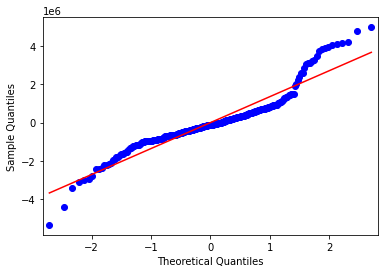

In [21]:
sm.qqplot(model.resid, line="s");

In [22]:
from scipy.stats import shapiro
shapiro(model.resid)

ShapiroResult(statistic=0.9081066846847534, pvalue=1.6332083255243823e-12)

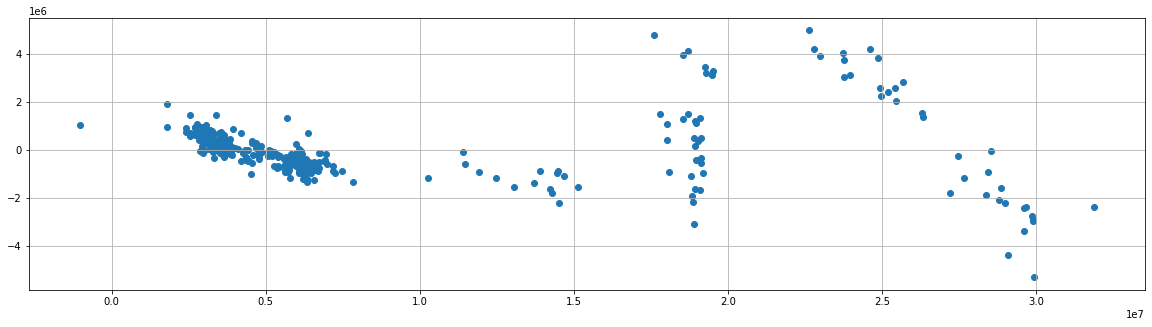

In [23]:
plt.figure(figsize=(20,5))
plt.scatter(x=model.fittedvalues, y=model.resid)
plt.grid(True)

In [24]:
res= pd.DataFrame(model.resid).reset_index(drop=True)
res.head()

,0
0,-1.035526e+05
1,-8.852634e+05
2,-1.554500e+06
3,-5.948047e+05
4,6.097322e+05


In [25]:
res = pd.DataFrame(model.resid).reset_index(drop=True)
res = res.rename(columns={0: "residuales"})
res.head()

,residuales
0,-1.035526e+05
1,-8.852634e+05
2,-1.554500e+06
3,-5.948047e+05
4,6.097322e+05


In [26]:
orden = pd.DataFrame(pd.Series(range(1,12622)))
orden = orden.rename(columns={0: 'orden'})
orden.head()

,orden
0,1
1,2
2,3
3,4
4,5


In [27]:
indep = pd.concat([orden, res], axis = 1)
indep.head()

,orden,residuales
0,1,-1.035526e+05
1,2,-8.852634e+05
2,3,-1.554500e+06
3,4,-5.948047e+05
4,5,6.097322e+05


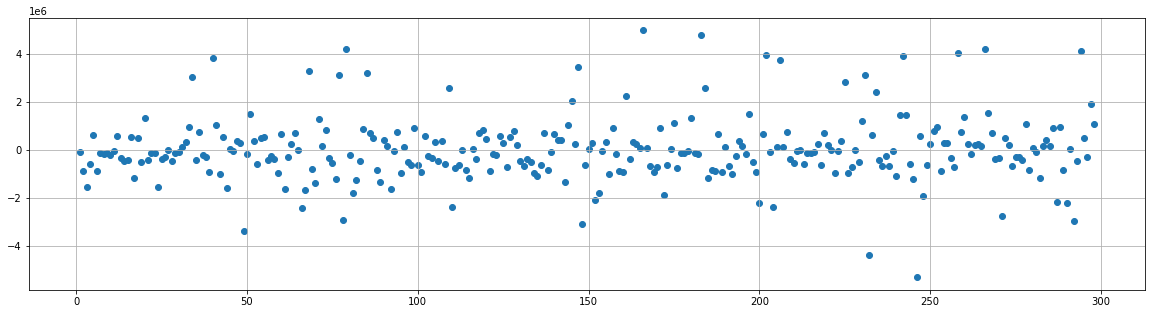

In [28]:
plt.figure(figsize=(20,5))
plt.scatter(x=indep['orden'], y=indep['residuales'])
plt.grid(True)

In [29]:
model.predict(X_test)

838    2.710488e+06
150    1.893150e+07
354    3.950583e+06
60     2.848878e+07
716    3.052583e+06
           ...     
806    4.028980e+06
510    5.532773e+06
216    1.900990e+07
202    1.871056e+07
684    2.510933e+06
Length: 129, dtype: float64

In [30]:
pred1 = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)
pred1 = pred1.rename(columns={0: 'pred1'})
pred1.head()

,pred1
0,2.710488e+06
1,1.893150e+07
2,3.950583e+06
3,2.848878e+07
4,3.052583e+06


In [31]:
pred1.shape

(129, 1)

In [32]:
y_test = y_test.reset_index(drop=True)
m1_resultados = pd.concat([y_test, pred1], axis = 1)
m1_resultados.head()

,Kilometros recorridos,pred1
0,3113232,2.710488e+06
1,18519000,1.893150e+07
2,3899800,3.950583e+06
3,25500600,2.848878e+07
4,3438177,3.052583e+06


In [33]:
y_test.head()

,Kilometros recorridos
0,3113232
1,18519000
2,3899800
3,25500600
4,3438177


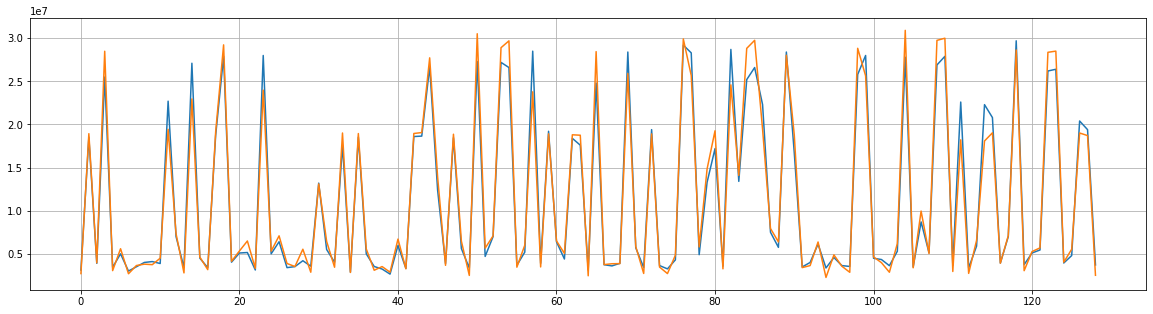

In [34]:
plt.figure(figsize=(20,5))
plt.plot(m1_resultados['Kilometros recorridos'])
plt.plot(m1_resultados['pred1'])
plt.grid(True)

In [35]:
m1_resultados = m1_resultados.head(20)

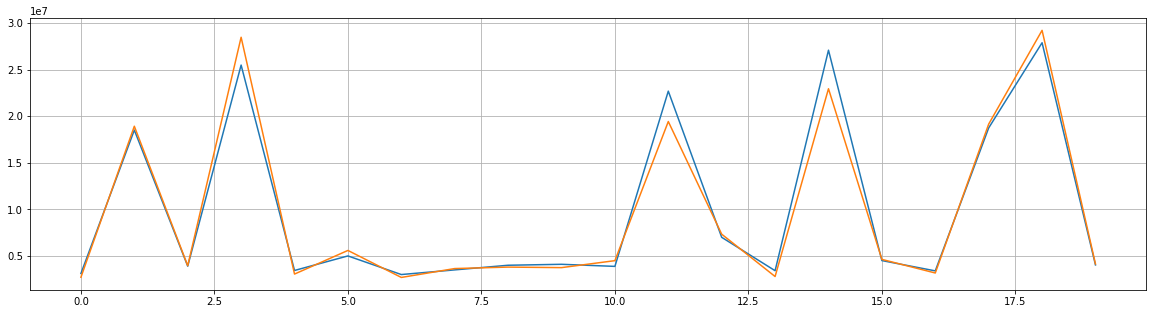

In [36]:
plt.figure(figsize=(20,5))
plt.plot(m1_resultados['Kilometros recorridos']) #azul - real
plt.plot(m1_resultados['pred1'])
plt.grid(True)

#Qué tan bien estan mis predicciones. 